In [23]:
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samub\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#TWITTER SENTIMENT ANALYSIS

In [ ]:
#DATA PROCESSING

In [ ]:
#MODEL BUILDING, TRAINING, TESTING, EVALUTION AND TRY NEW VALUES

# 1. Data preprocessing:
• Load the Dataset and analyse

• Remove irrelevant columns like ids, dates, flags, and users.

• Clean the text data by removing noise like special characters, punctuations, and URLs.

• Convert the text to lowercase and remove stop words.

• Convert the target column to binary (0 for negative and 1 for positive tweets).

# Load the Dataset and analyse

In [25]:
import pandas as pd

In [26]:
Twitter_DF=pd.read_csv(r"twitter_new.csv",encoding='latin-1', header = None)
Twitter_DF

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [27]:
column_names = ["target","ids","dates","flags","users","text"]
Twitter_DF.columns = column_names

In [28]:
Twitter_DF.head()

,target,ids,dates,flags,users,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [29]:
Twitter_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   dates   1600000 non-null  object
 3   flags   1600000 non-null  object
 4   users   1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


# Remove irrelevant columns like ids, dates, flags, and users.

In [30]:
# Remove the irrelevant columns using the drop() method
Twitter_DF = Twitter_DF.drop(['ids', 'dates', 'flags', 'users'], axis=1)

# Print the first few rows of the cleaned dataframe
print(Twitter_DF.head(10))

   target                                               text
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1       0  is upset that he can't update his Facebook by ...
2       0  @Kenichan I dived many times for the ball. Man...
3       0    my whole body feels itchy and like its on fire 
4       0  @nationwideclass no, it's not behaving at all....
5       0                      @Kwesidei not the whole crew 
6       0                                        Need a hug 
7       0  @LOLTrish hey  long time no see! Yes.. Rains a...
8       0               @Tatiana_K nope they didn't have it 
9       0                          @twittera que me muera ? 


# Clean the text data by removing noise like special characters, punctuations, and URLs.

In [31]:
import re
# Define a function to clean the text data
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply the clean_text function to the 'text' column
Twitter_DF['text'] = Twitter_DF['text'].apply(clean_text)

# Print the first few rows of the cleaned dataframe
print(Twitter_DF.head())

   target                                               text
0       0  switchfoot   awww thats a bummer  you shoulda ...
1       0  is upset that he cant update his facebook by t...
2       0  kenichan i dived many times for the ball manag...
3       0    my whole body feels itchy and like its on fire 
4       0  nationwideclass no its not behaving at all im ...


# Convert the text to lowercase and remove stop words.

In [32]:
stopwords = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'you\'re', 
    'you\'ve', 'you\'ll', 'you\'d', 'your', 'yours', 'yourself', 'yourselves', 'he', 
    'him', 'his', 'himself', 'she', 'she\'s', 'her', 'hers', 'herself', 'it', 'it\'s', 
    'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 
    'who', 'whom', 'this', 'that', 'that\'ll', 'these', 'those', 'am', 'is', 'are', 
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 
    'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 
    'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 
    'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 
    'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 
    'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 
    'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 
    'will', 'just', 'don', 'don\'t', 'should', 'should\'ve', 'now', 'd', 'll', 
    'm', 'o', 're', 've', 'y', 'ain', 'aren', 'aren\'t', 'couldn', 'couldn\'t', 
    'didn', 'didn\'t', 'doesn', 'doesn\'t', 'hadn', 'hadn\'t', 'hasn', 'hasn\'t', 
    'haven', 'haven\'t', 'isn', 'isn\'t', 'ma', 'mightn', 'mightn\'t', 'mustn', 
    'mustn\'t', 'needn', 'needn\'t', 'shan', 'shan\'t', 'shouldn', 'shouldn\'t', 
    'wasn', 'wasn\'t', 'weren', 'weren\'t', 'won', 'won\'t', 'wouldn', 'wouldn\'t']

In [ ]:
import nltk
# Define a function to clean and preprocess the text data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    # Remove stop words
    words = [word for word in words if not word in stopwords]
    # Join the remaining words back into a single string
    cleaned_text = ' '.join(words)
    return cleaned_text
# Apply the preprocess_text function to the 'text' column
Twitter_DF['text'] = Twitter_DF['text'].apply(preprocess_text)
# Print the first few rows of the cleaned dataframe
print(Twitter_DF.head())

In [ ]:
##Converting the targrt column to 0, 2 and if 1 then neutral

In [21]:
Twitter_DF['final_target'] = Twitter_DF['target'].apply(lambda x: 0 if x == 0 else 2 if x == 4 else 1)
print(Twitter_DF['final_target'].value_counts())

final_target
0    800000
2    800000
Name: count, dtype: int64


In [22]:
Twitter_DF

,target,text,final_target
0,0,switchfoot awww thats a bummer you shoulda ...,0
1,0,is upset that he cant update his facebook by t...,0
2,0,kenichan i dived many times for the ball manag...,0
3,0,my whole body feels itchy and like its on fire,0
4,0,nationwideclass no its not behaving at all im ...,0
...,...,...,...
1599995,4,just woke up having no school is the best feel...,2
1599996,4,thewdbcom very cool to hear old walt intervie...,2
1599997,4,are you ready for your mojo makeover ask me fo...,2
1599998,4,happy th birthday to my boo of alll time tupac...,2


# Target colum distribution overview

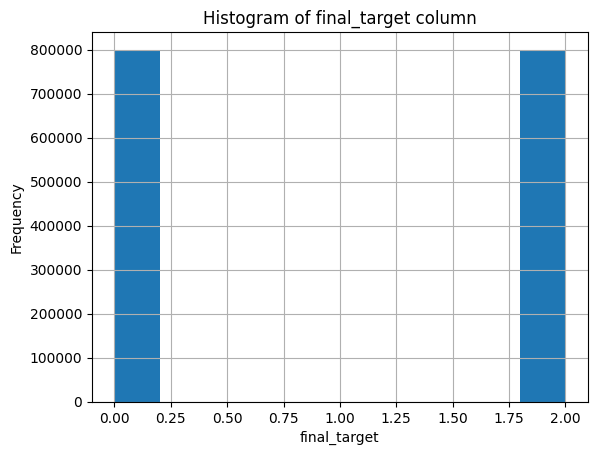

In [57]:
import matplotlib.pyplot as plt
# draw histogram for a column in the DataFrame

Twitter_DF['final_target'].hist()
plt.title('Histogram of final_target column')
plt.xlabel('final_target')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# DATA PRE-PROCESSING OBSERVATIONS

# The dataset consists of six columns, with the target feature being the dependent variable.
# The dataset does not have any null or missing values.
# Features such as IDs, date, flag, and user are not relevant for sentiment analysis and have been removed.
# Noise data such as punctuations, special characters, and URLs have been removed.
# The text has been converted to lowercase and stopwords have been removed.
# As a result of these pre-processing steps, the target column now consists of three values, 
# 0 for negative, 1 for neutral, and 2 for positive.
# The target column has an equal number of positive and negative values, making it a balanced dataset

In [58]:
Twitter_DF

,target,text,final_target
0,0,switchfoot awww thats bummer shoulda got david...,0
1,0,upset cant update facebook texting might cry r...,0
2,0,kenichan dived many times ball managed save re...,0
3,0,whole body feels itchy like fire,0
4,0,nationwideclass behaving im mad cant see,0
...,...,...,...
1599995,4,woke school best feeling ever,2
1599996,4,thewdbcom cool hear old walt interviews â,2
1599997,4,ready mojo makeover ask details,2
1599998,4,happy th birthday boo alll time tupac amaru sh...,2


In [ ]:
# Twitter_DF.drop(columns=['target'], inplace=True)
Twitter_DF

# MODEL TRAINING, TESTING, EVALUTION AND TRY NEW VALUES
#MODEL TRAINING

In [59]:
from sklearn.model_selection import train_test_split
Independent_var = Twitter_DF['text'] 
Dependent_var = Twitter_DF['final_target']

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))

IV_train : 1440000
IV_test  : 160000
DV_train : 1440000
DV_test  : 160000


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs",max_iter=200000)

from sklearn.pipeline import Pipeline

In [61]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)

from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[61430, 15829],
       [18344, 64397]], dtype=int64)

# MODEL TEST AND EVALUTION

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.78641875
Precision :  0.7869318806492732
Recall :  0.78641875


In [63]:
example = ["OHH ITS WONDERFUL"]
result = model.predict(example)
print(result)

[2]
